# Multiclass Classification

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 25s 2us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [13]:
print(train_labels)
print(train_labels.shape)

[5 0 4 ... 5 6 8]
(60000,)


In [4]:
import matplotlib.pyplot as plt

4


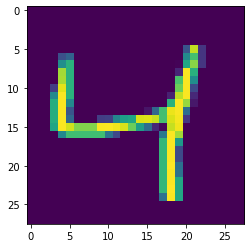

In [7]:
index = 2
plt.imshow(train_images[index])
print(train_labels[index])

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [9]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',    #sparse_categorical_crossentropy
                metrics=['accuracy'])

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [14]:
# One-hot Encoding
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 39s 652us/sample - loss: 0.2546 - accuracy: 0.9261
Epoch 2/5
60000/60000 [==============================] - 25s 424us/sample - loss: 0.1042 - accuracy: 0.9688
Epoch 3/5
60000/60000 [==============================] - 35s 576us/sample - loss: 0.0675 - accuracy: 0.9792
Epoch 4/5
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0497 - accuracy: 0.9854
Epoch 5/5
60000/60000 [==============================] - 28s 465us/sample - loss: 0.0375 - accuracy: 0.9887


In [18]:
network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 6s 625us/sample - loss: 0.0633 - accuracy: 0.9814


[0.0632547073841677, 0.9814]